**Contexte du projet**

Lending Club est une société de prêt peer-to-peer basée aux États-Unis. Ils mettent en relation des personnes cherchant à investir de l’argent avec des personnes cherchant à emprunter de l’argent. Lorsque les investisseurs investissent leur argent par l’intermédiaire de Lending Club, cet argent est transmis aux emprunteurs, et lorsque les emprunteurs remboursent leurs prêts, le capital et les intérêts sont reversés aux investisseurs. C’est une victoire pour tout le monde car ils peuvent obtenir des taux de prêt généralement plus bas et des rendements plus élevés pour les investisseurs.

L’ensemble de données Lending Club contient des données complètes sur les prêts accordés pour tous les prêts émis entre 2007 et 2015, y compris l’état actuel des prêts (actuel, en retard, entièrement payé, etc.) et les dernières informations sur les paiements. Les caractéristiques (alias variables) comprennent les cotes de crédit, le nombre de demandes de financement, l’adresse, y compris les codes postaux et l’état, et les recouvrements, entre autres. Les recouvrements indiquent si le client a manqué un ou plusieurs paiements et si l’équipe essaie de récupérer son argent. Le fichier est une matrice d’environ 890 000 observations et 75 variables.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

##Import des jeux de données et tests

In [ ]:
df_info = pd.read_csv('/content/drive/MyDrive/Classroom/EPSI DATAVIZ/lending_club_info.csv',index_col='LoanStatNew')

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Classroom/EPSI DATAVIZ/lending_club_loan_two.csv')

In [ ]:
df_info.loc['loan_amnt']['Description']

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

##2 Description du dataset

In [ ]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<Axes: ylabel='count'>

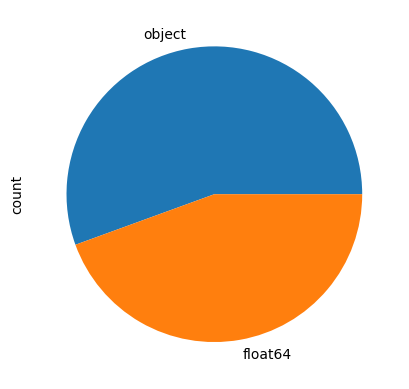

In [ ]:
#graphique qui montre la proportion de chaque type de données dans le DataFrame.
df.dtypes.value_counts().plot.pie()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
#Vue claire sur les données manquantes dans le DataFrame.
missing_value= df.isnull().sum()
missing_per = (missing_value/len(df))*100
missing_table = pd.DataFrame({'Missing value': missing_value, 'Percentage': missing_per})
print(missing_table)

                      Missing value  Percentage
loan_amnt                         0    0.000000
term                              0    0.000000
int_rate                          0    0.000000
installment                       0    0.000000
grade                             0    0.000000
sub_grade                         0    0.000000
emp_title                     22927    5.789208
emp_length                    18301    4.621115
home_ownership                    0    0.000000
annual_inc                        0    0.000000
verification_status               0    0.000000
issue_d                           0    0.000000
loan_status                       0    0.000000
purpose                           0    0.000000
title                          1756    0.443401
dti                               0    0.000000
earliest_cr_line                  0    0.000000
open_acc                          0    0.000000
pub_rec                           0    0.000000
revol_bal                         0    0

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
features = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address']

target_variable ='loan_status'

Ce code parcourt une liste de caractéristiques (features) et génère des graphiques bivariés pour chaque caractéristique par rapport à la variable cible(loan_status). Si la caractéristique est numérique, il crée un nuage de points (scatter plot) montrant la relation entre la caractéristique et la variable cible (loan_status). Si la caractéristique est catégorique, il crée un graphique à barres (count plot) affichant la fréquence de chaque catégorie de la caractéristique, différenciée par la variable cible. Ceci permet d'analyser la relation entre chaque caractéristique et la variable cible dans un ensemble de données.

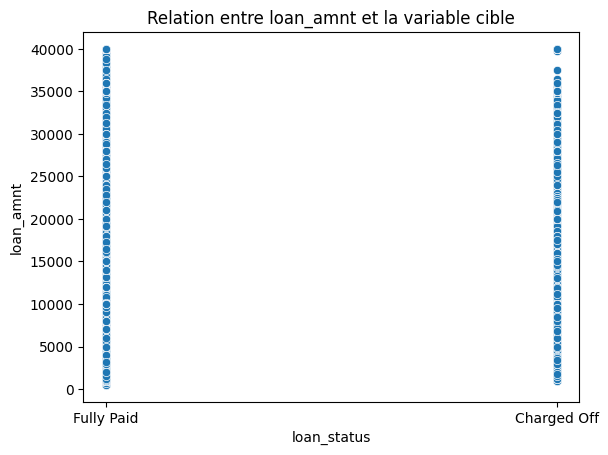

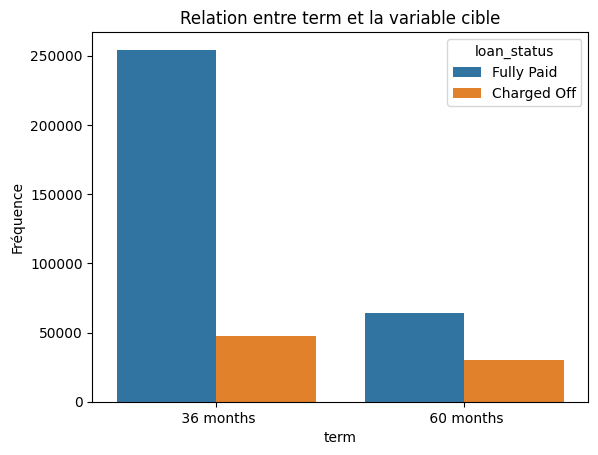

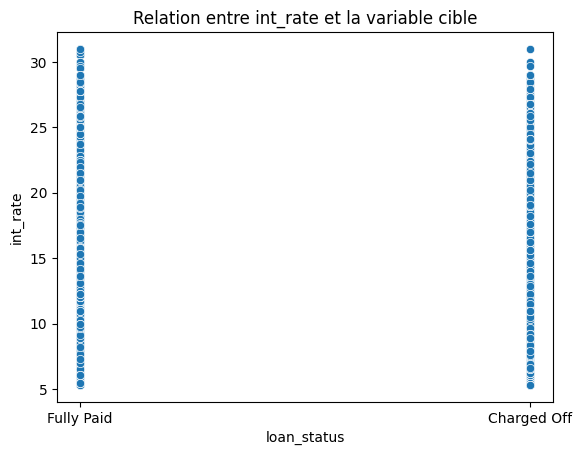

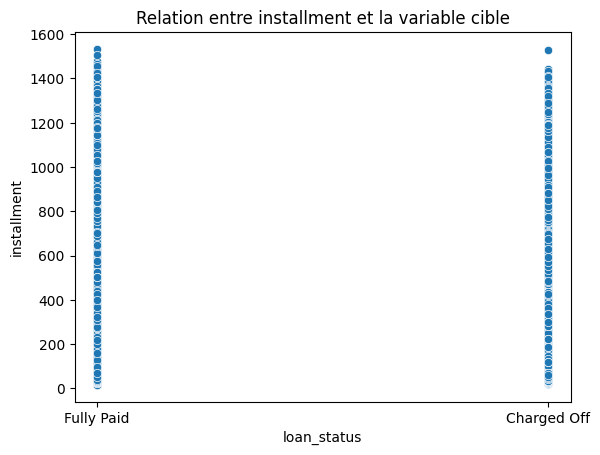

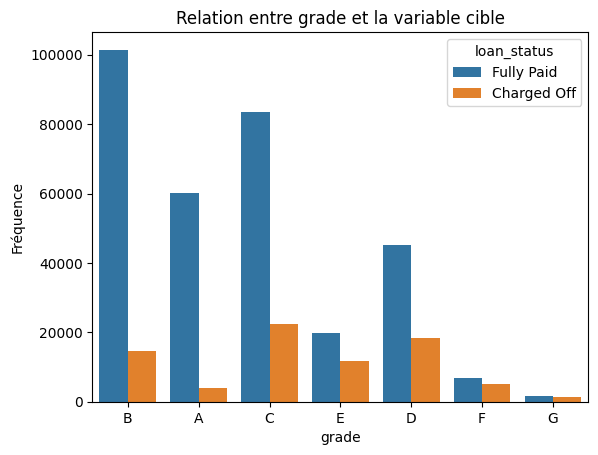

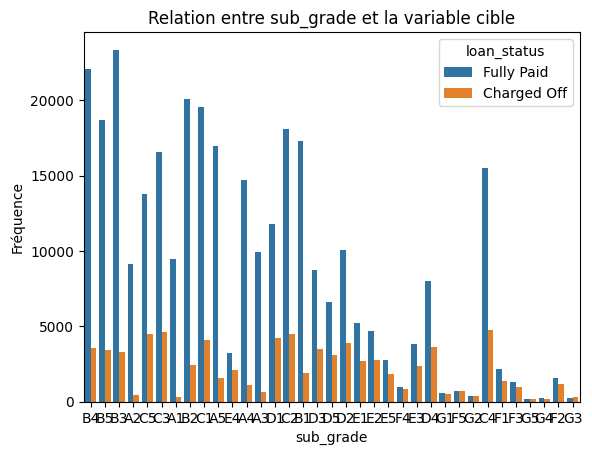

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
T$$ - ACHWorks
 ^
ParseException: Expected end of text, found '$'  (at char 1), (line:1, col:2)

<Figure size 640x480 with 1 Axes>

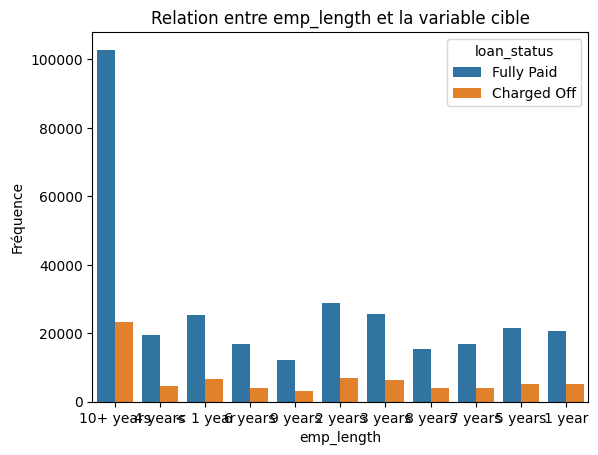

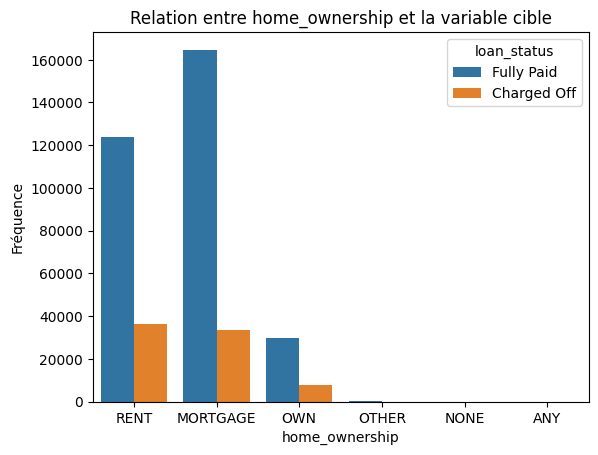

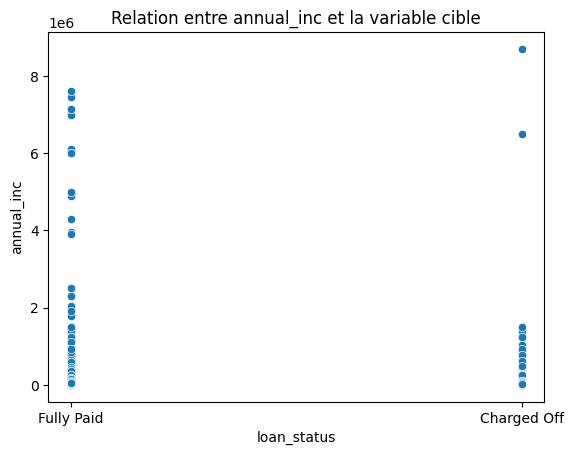

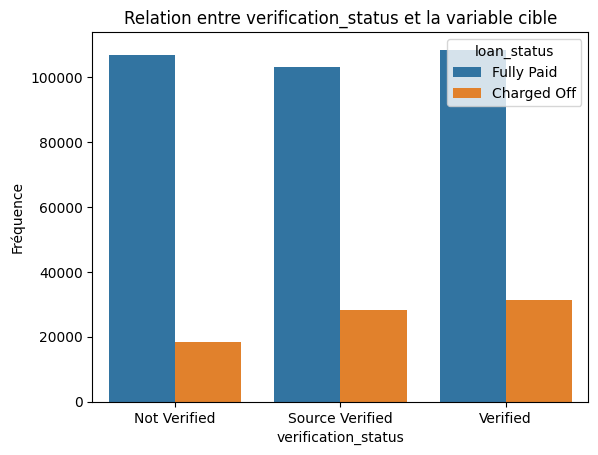

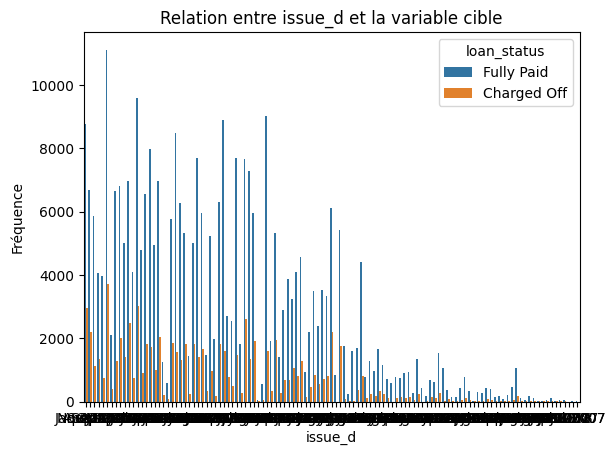

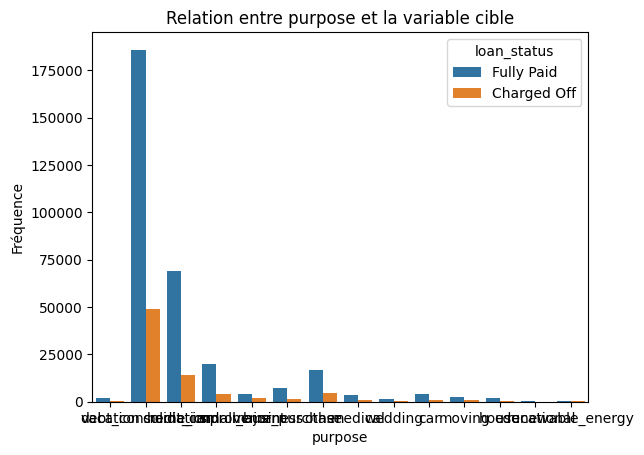

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
Consolidating at a lower rate to save $$
                                      ^
ParseException: Expected end of text, found '$'  (at char 38), (line:1, col:39)

<Figure size 640x480 with 1 Axes>

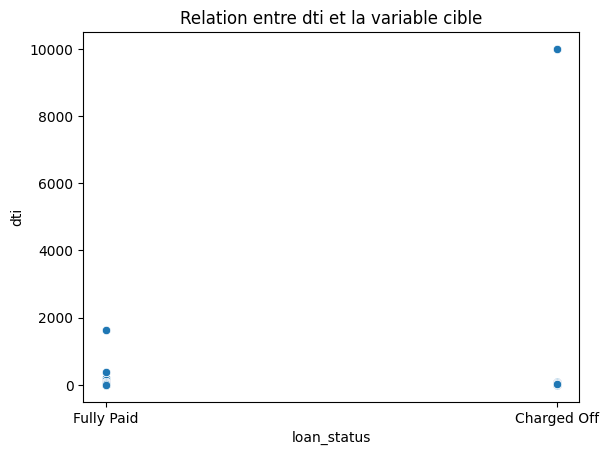

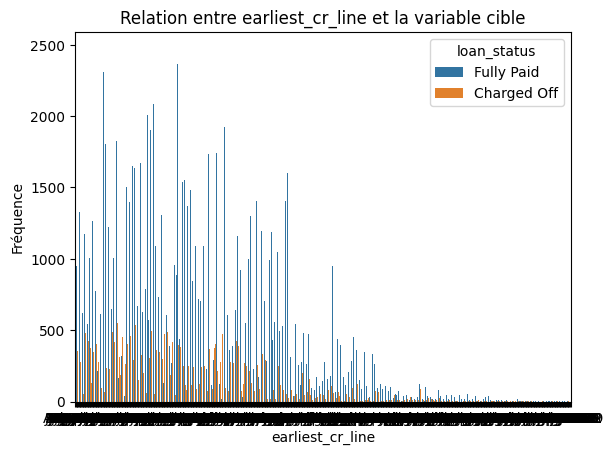

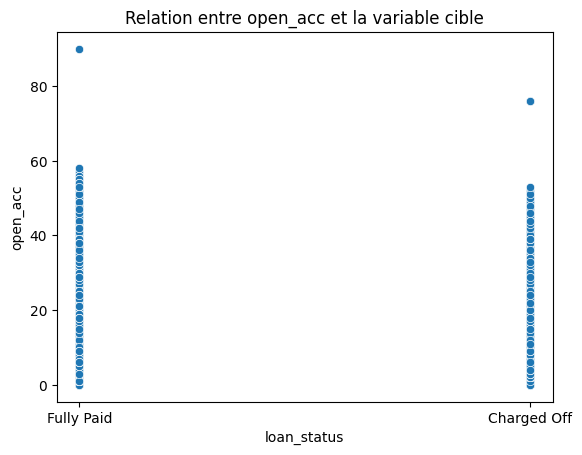

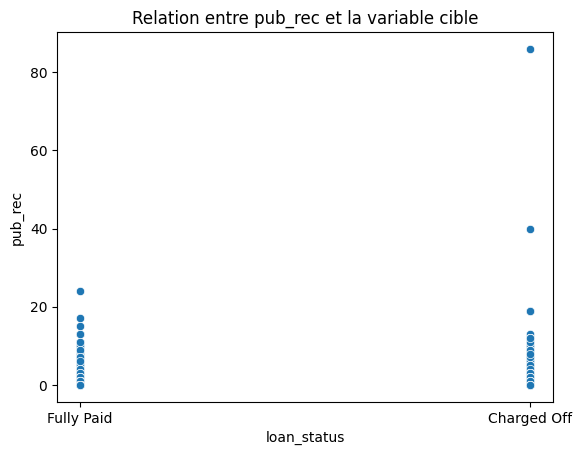

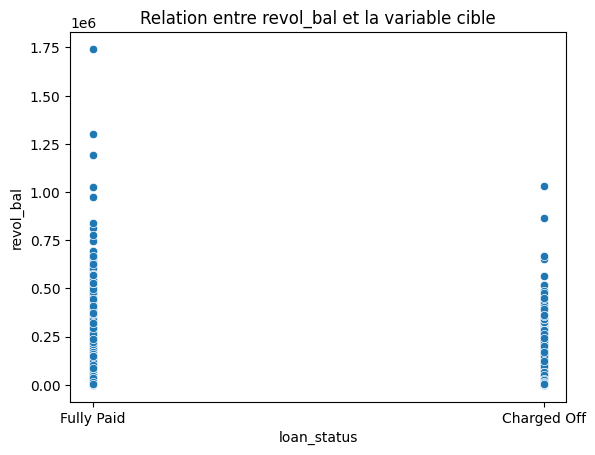

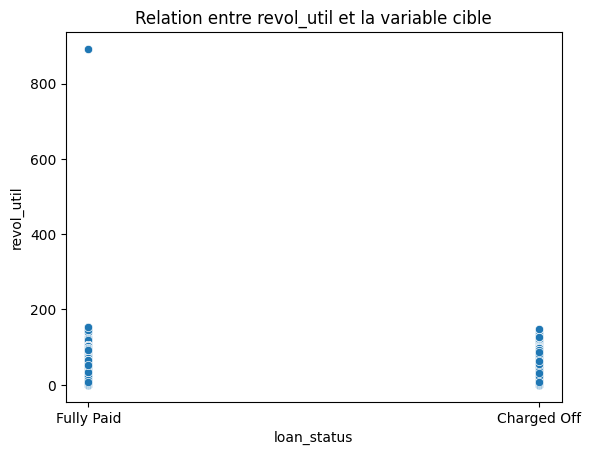

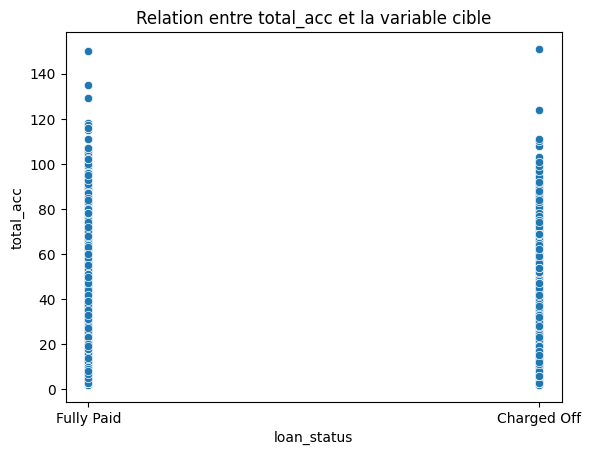

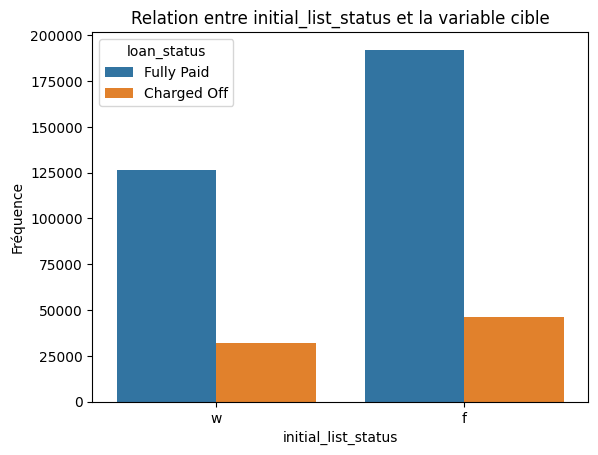

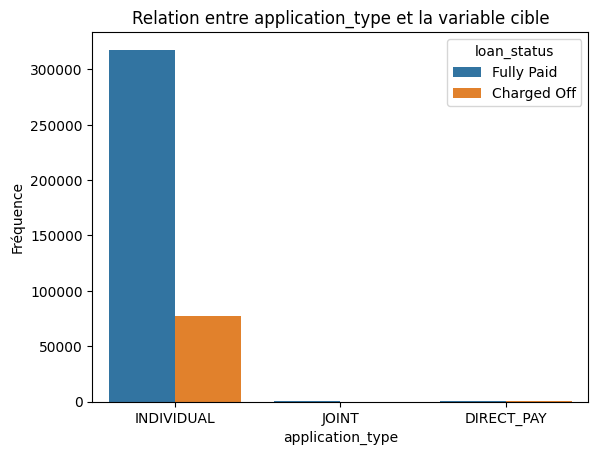

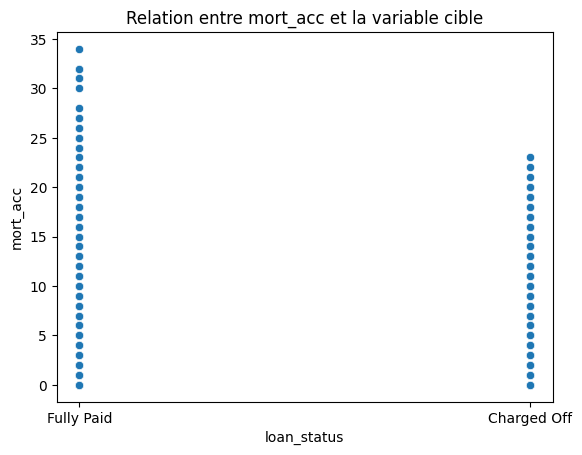

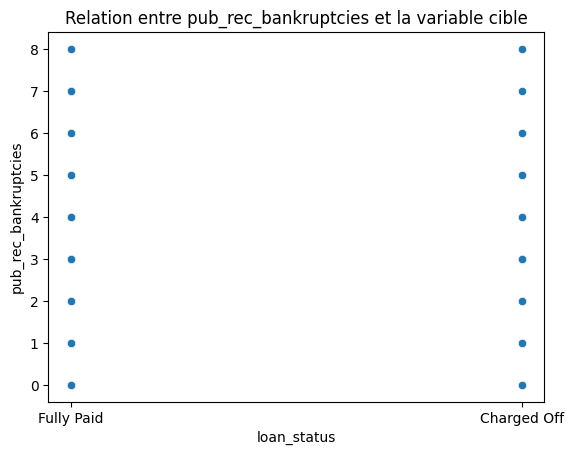

In [ ]:
# Boucle pour générer les graphiques bivariés pour chaque feature par rapport à la variable loan_status
for feature in features:
# Vérifie si la feature est numérique
    if df[feature].dtype != 'object':
        sns.scatterplot(x=target_variable, y=feature, data=df)
        plt.title(f'Relation entre {feature} et la variable cible')
        plt.xlabel('loan_status')
        plt.ylabel(feature)
        plt.show()
    else:
        sns.countplot(x=feature, hue=target_variable, data=df)
        plt.title(f'Relation entre {feature} et la variable cible')
        plt.xlabel(feature)
        plt.ylabel('Fréquence')
        plt.show()

In [ ]:
# 2. Descriptions du dataset
# (a) Afficher les dimensions, et les noms des variables du dataset.
print("Dimensions du dataset:", df)
# print("Noms des variables du dataset:", df.columns)

Dimensions du dataset:         loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                      Marketing 


digramme à barres qui montre la répartition des valeurs de  'loan_status' dans le DataFrame (df).

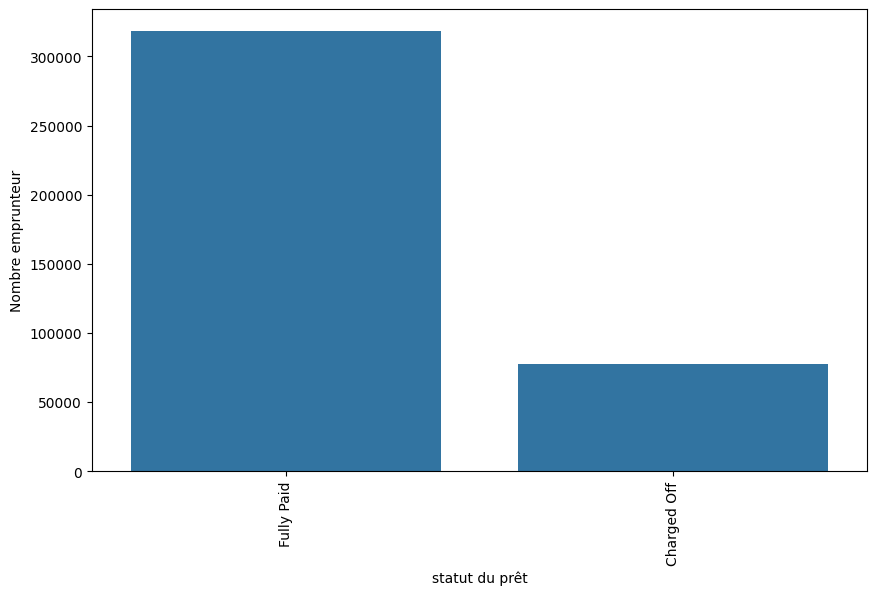

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df)
plt.xlabel('statut du prêt')
plt.ylabel('Nombre emprunteur')
plt.xticks(rotation=90)
plt.show()

In [ ]:
object_columns = df.select_dtypes(include=['object'])
num_columns = df.select_dtypes(include=['float64'])
# Afficher les noms de ces colonnes
print(' "Séparation des variables catégorielle et numérique" \n')
print("Colonnes de type objet :")
print(object_columns.columns)
print("Colonnes de type float :")
print(num_columns.columns)

 "Séparation des variables catégorielle et numérique" 

Colonnes de type objet :
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')
Colonnes de type float :
Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')


In [ ]:
#Mettre les colonnes dans une variable sous forme de liste pour pour voir manipuler plus facilement les deux différents types de variable
var_cat = object_columns.columns
var_num = num_columns.columns

In [ ]:
import missingno as msno

Missingno est une bibliothèque Python conçue pour visualiser les données manquantes dans un ensemble de données. Sa plus-value réside dans sa capacité à fournir rapidement des informations visuelles sur les données manquantes, ce qui peut être crucial dans le processus d'analyse de données et de nettoyage des données.



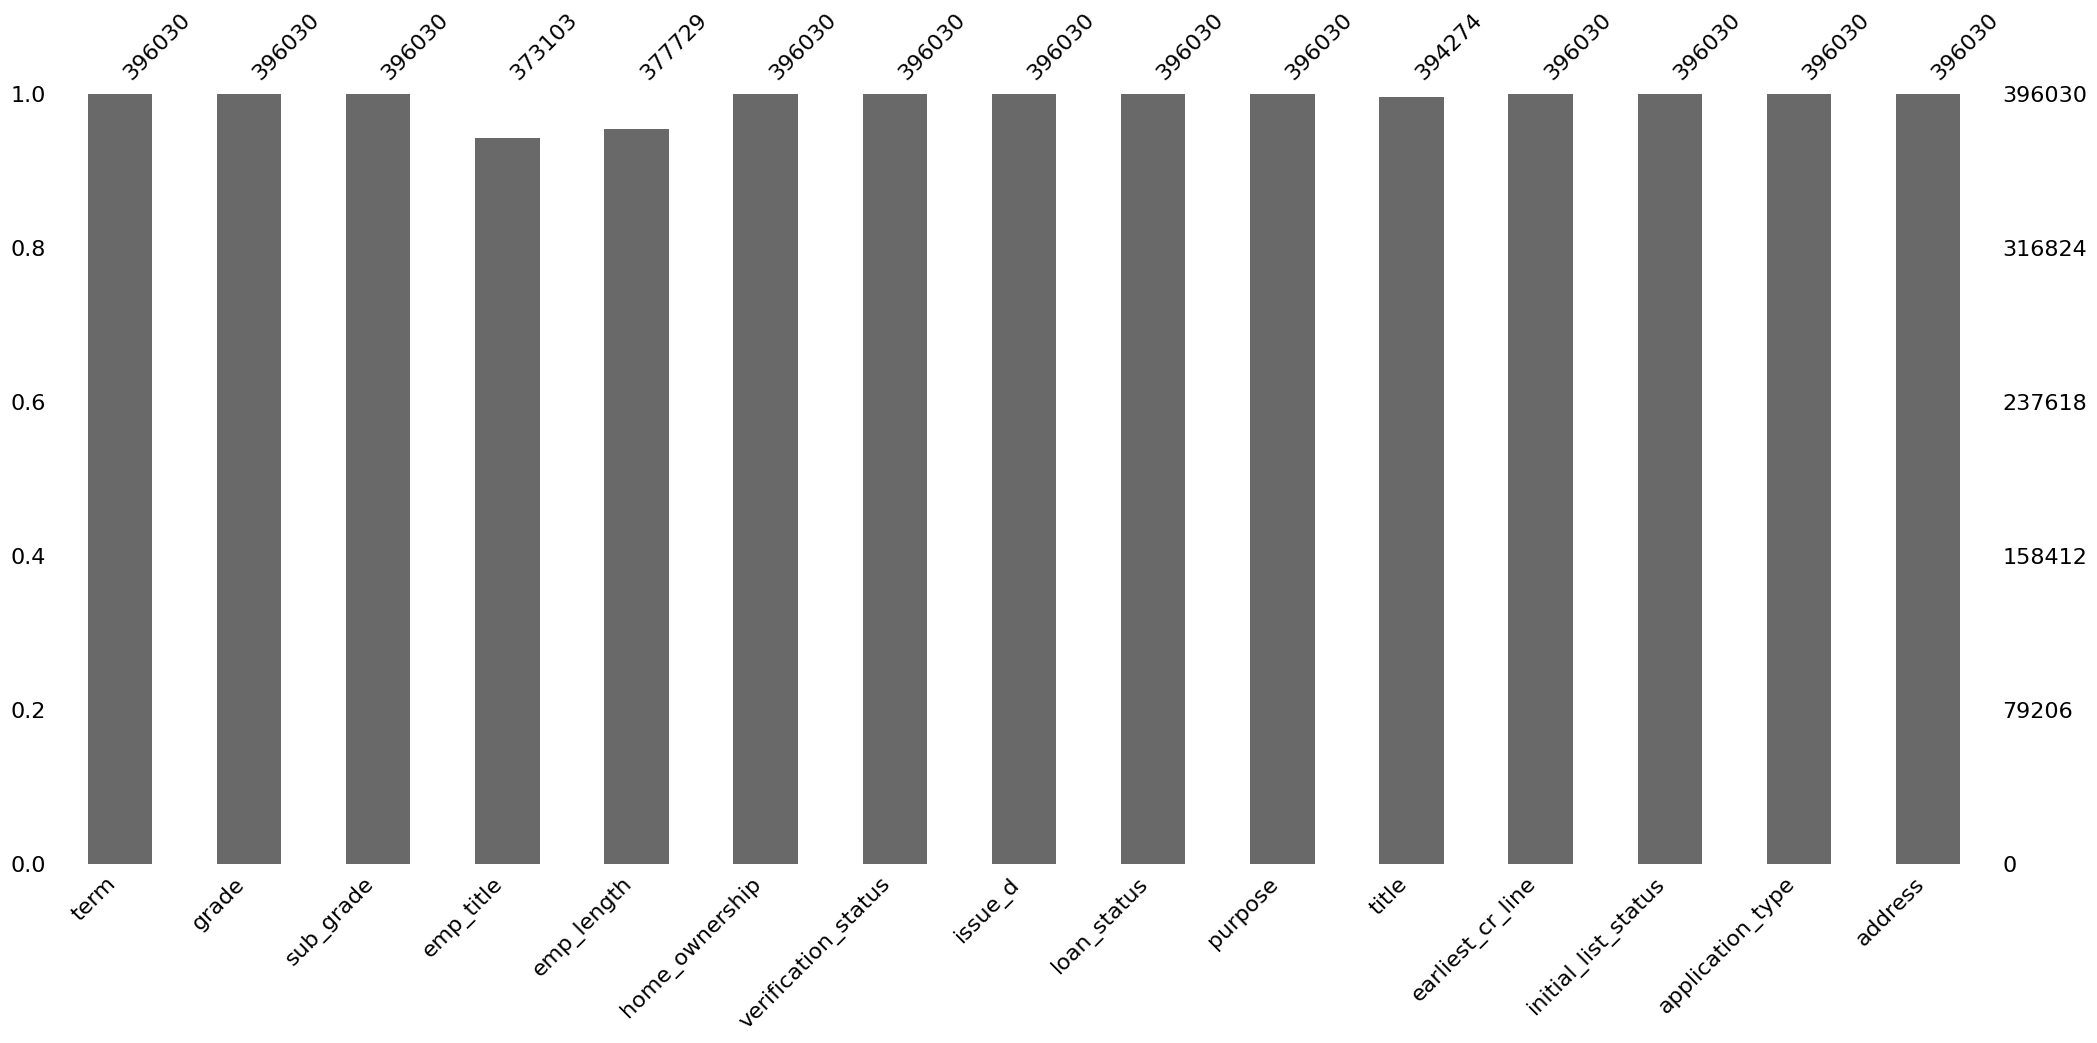

In [ ]:
#valeurs manquantes dans les colonnes objects avec missingno
plt.figure(figsize=(22, 12))
msno.bar(df[var_cat])
plt.show()

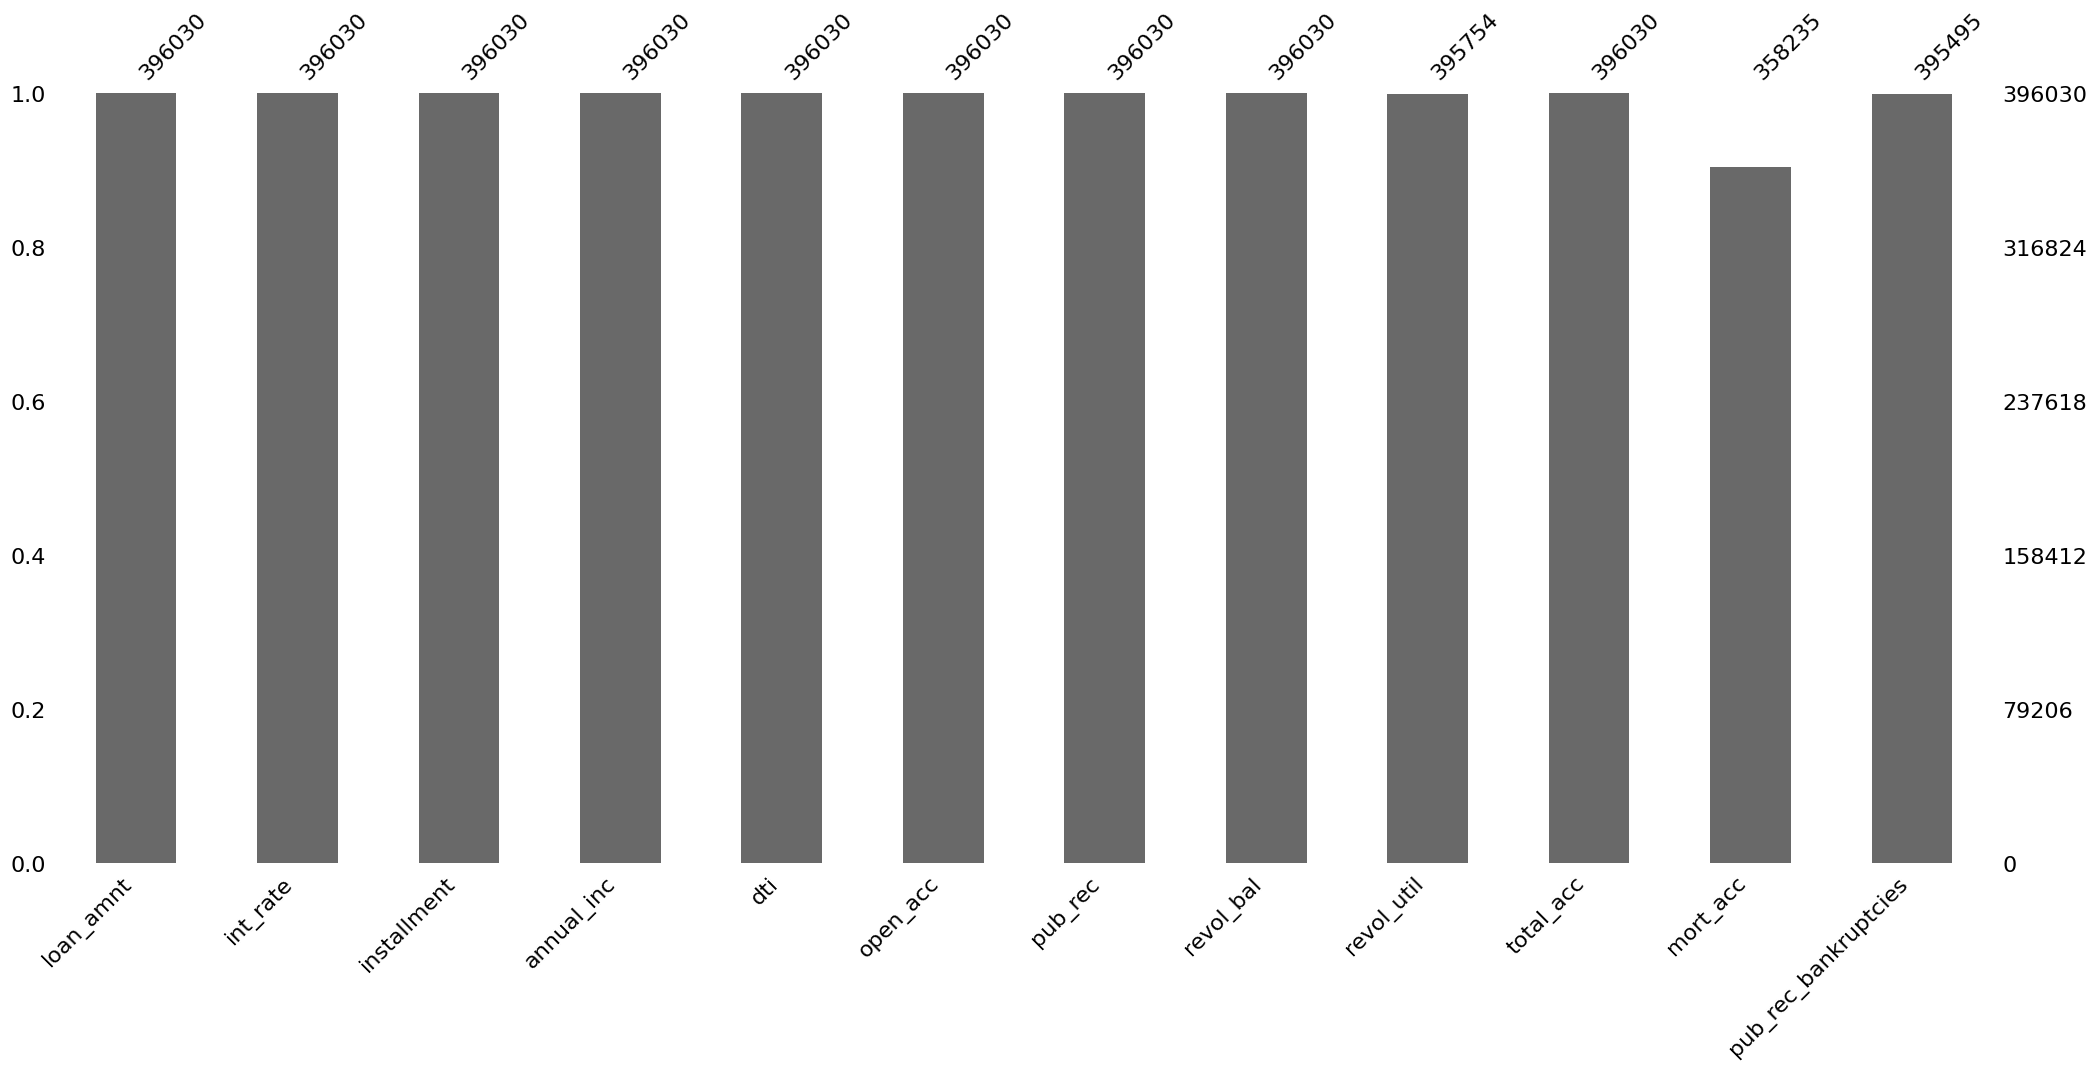

In [ ]:
#valeurs manquantes dans les colonnes numériques avec missingno
plt.figure(figsize=(22, 12))
msno.bar(df[var_num])
plt.show()

In [ ]:
#desciption des variables numeriques
df[var_num].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## Analyse univariée

In [ ]:
#répartition des valeurs de 'loan_status' et de leur proportion respective dans le DataFrame.
credit = df['loan_status'].value_counts()
credit_per = (credit/credit.sum())*100
credit_res =  pd.DataFrame({'Credit': credit, '%credit': credit_per})
print(credit_res)

             Credit    %credit
loan_status                   
Fully Paid   318357  80.387092
Charged Off   77673  19.612908


En termes plus simples, le tableau montre que la majorité du crédit (80,39 %) provient de prêts qui ont été entièrement remboursés par les emprunteurs. Le crédit restant (19,61 %) provient de prêts qui n'ont pas été entièrement remboursés et sont considérés comme une perte par le prêteur.

In [ ]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [ ]:
df.shape

(396030, 27)

In [ ]:
# 4. Etude de variable
# (a) Donner les informations des variables loan_status et installment.
print("Informations sur la variable loan_status:")
print(df['loan_status'].describe())
print("\nInformations sur la variable installment:")
print(df['installment'].describe())

Informations sur la variable loan_status:
count         396030
unique             2
top       Fully Paid
freq          318357
Name: loan_status, dtype: object

Informations sur la variable installment:
count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64


## Etude de la variable

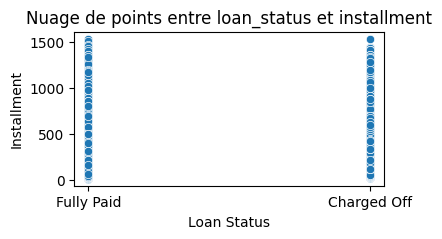

In [ ]:
# (b) Donner le nuage de points de ces deux variables. Que peut-on remarquer?
plt.figure(figsize=(4, 2))
sns.scatterplot(x='loan_status', y='installment', data=df)
plt.title('Nuage de points entre loan_status et installment')
plt.xlabel('Loan Status')
plt.ylabel('Installment')
plt.show()


Les variables "loan_status" et "installment" pourraient être indépendantes l'une de l'autre et ne pas avoir de relation linéaire claire. Cela signifie que installment n'est pas directement lié à Loan_statuts.

In [ ]:
df['installment'].unique()

array([329.48, 265.68, 506.97, ..., 343.14, 118.13, 572.44])

##5. Etude de la variable réponse

Analyse de la répartition des loan_amnt pour différents statuts, mettant en évidence les médianes, les quartiles et les valeurs aberrantes éventuelles. Cela aide à comprendre la relation entre le montant du prêt et son statut, ce qui peut être utile pour évaluer les tendances de prêt et les performances financières.

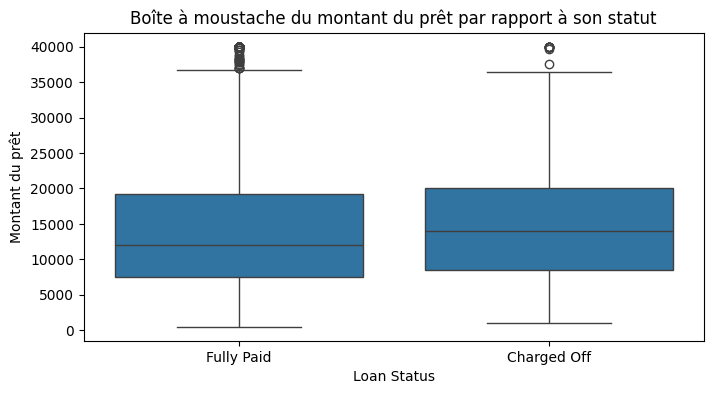

In [ ]:
# boîte à moustache de la valeur du prix par rapport à son statut.
plt.figure(figsize=(8, 4))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Boîte à moustache du montant du prêt par rapport à son statut')
plt.xlabel('Loan Status')
plt.ylabel('Montant du prêt')
plt.show()

In [ ]:
# description de la valeur du prêt regroupé par son statut (fonction groupby).
loan_status_description = df.groupby('loan_status')['loan_amnt'].describe()
print("Description du montant du prêt regroupé par son statut:")
print(loan_status_description)

Description du montant du prêt regroupé par son statut:
                count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0  


Ces résultats suggèrent qu'il n'y a pas une différence significative dans la moyenne du montant des prêts entre les prêts remboursés et ceux qui ont été marqués comme "Charged Off". Cependant, il semble y avoir une légère tendance à ce que les prêts "Charged Off" aient des montants moyens légèrement plus élevés que les prêts entièrement remboursés.

##6 Application

In [ ]:
Changer les valeurs de la variable réponse par 0 si le prêt n’a pas été remboursé et 1 sinon.
df['loan_status'] = df['loan_status'].map({'Charged Off': 0, 'Fully Paid': 1})

In [ ]:
# Vérifier que cela a fonctionné.
print("Vérification des nouvelles valeurs de la variable réponse:")
print(df['loan_status'].value_counts())

Vérification des nouvelles valeurs de la variable réponse:
loan_status
1    318357
0     77673
Name: count, dtype: int64


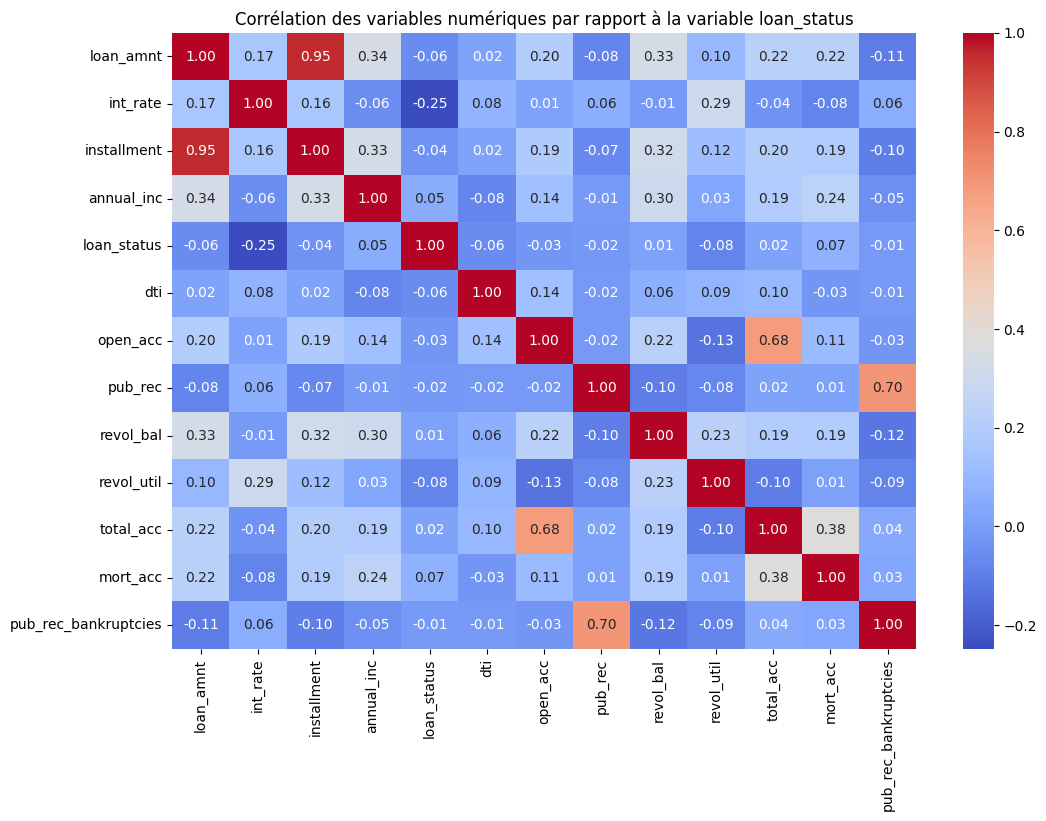


Variables les plus significatives par rapport à 'loan_status':
 int_rate                0.247758
revol_util              0.082373
mort_acc                0.073111
dti                     0.062413
loan_amnt               0.059836
annual_inc              0.053432
installment             0.041082
open_acc                0.028012
pub_rec                 0.019933
total_acc               0.017893
revol_bal               0.010892
pub_rec_bankruptcies    0.009383
Name: loan_status, dtype: float64


In [ ]:
# les corrélations des variables numériques par rapport à la variable réponse.
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation des variables numériques par rapport à la variable loan_status")
plt.show()

# Trie des valeurs par ordre croissant et afficher
significant_variables = correlation_matrix['loan_status'].abs().sort_values(ascending=False)[1:]
print("\nVariables les plus significatives par rapport à 'loan_status':\n", significant_variables)

##7 Travail sur les données

In [ ]:
#Pourcentage de valeurs manquantes par variables.
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("Pourcentage de valeurs manquantes par variable:")
print(missing_values_percentage)

Pourcentage de valeurs manquantes par variable:
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64


In [ ]:
#Observation de la variable emp_title et déduire s’il faut la supprimer ou non.
missing_emp_title_percentage = (df['emp_title'].isnull().sum() / len(df['emp_title'])) * 100
print("Pourcentage de valeurs manquantes dans la colonne emp_title :", missing_emp_title_percentage)
print('')
print("Nombre de catégories uniques dans emp_title:", df['emp_title'].unique())

Pourcentage de valeurs manquantes dans la colonne emp_title : 5.7892078882912905

Nombre de catégories uniques dans emp_title: ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']



Étant donné la diversité des emplois occupés par les emprunteurs, il est difficile de déterminer si cela influe directement sur leur capacité à rembourser leur prêt. Afin de préserver l'intégrité de l'entraînement du modèle, nous avons exclu la variable "emp_title".

In [ ]:
df = df.drop('emp_title', axis=1)

In [ ]:
print("Vérification du contenu de emp_length:")
print(df['emp_length'].value_counts())

Vérification du contenu de emp_length:
emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64


In [ ]:
# Valeur moyenne de la variable réponse du dataset regroupé par la variable emp_length, qu’en déduire ?
loan_status_mean_by_emp_length = df.groupby('emp_length')['loan_status'].mean()
print("Valeur moyenne de la variable réponse (loan_status) regroupée par emp_length:")
print(loan_status_mean_by_emp_length)

Valeur moyenne de la variable réponse (loan_status) regroupée par emp_length:
emp_length
1 year       0.800865
10+ years    0.815814
2 years      0.806738
3 years      0.804769
4 years      0.807615
5 years      0.807813
6 years      0.810806
7 years      0.805226
8 years      0.800240
9 years      0.799530
< 1 year     0.793128
Name: loan_status, dtype: float64


Ces résultats peuvent indiquer que l'expérience  n'est pas facteur significatif dans l'évaluation du risque de crédit des emprunteurs

In [ ]:
# Supprimer la variable emp_length.
df.drop('emp_length', axis=1, inplace=True)

In [ ]:
df.shape

(396030, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  int64  
 11  purpose               396030 non-null  object 
 12  title                 394274 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

##8.Question ouverte

In [ ]:
# 8. Question ouverte
# Que représente la variable mort_acc ?
# Cette variable peut potentiellement représenter le nombre de comptes de prêt hypothécaire ou d'autres types de comptes de crédit ouverts par l'emprunteur.
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [ ]:
# Remplacer les valeurs manquantes de mort_acc par leur moyenne.
mort_acc_mean = df['mort_acc'].mean()
df['mort_acc'].fillna(mort_acc_mean, inplace=True)

In [ ]:
#remplacer les autres valeurs manqunates
df['revol_util'].fillna(df['revol_util'].median(),inplace=True)
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(),inplace=True)

In [ ]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [ ]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("Pourcentage de valeurs manquantes par variable:")
print(missing_values_percentage)

Pourcentage de valeurs manquantes par variable:
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.000000
address                 0.000000
dtype: float64


In [ ]:
# (voir dans le projet) Supprimer la variable title et issue_d.
df.drop('title', axis=1, inplace=True)
df.drop('issue_d', axis=1, inplace=True)

In [ ]:
# Changer les valeurs de term par leur valeurs numériques en mois.
df['term'] = df['term'].apply(lambda x: int(x.strip().split()[0]))

In [ ]:
# Supprimer la variable grade.
df.drop('grade', axis=1, inplace=True)

In [ ]:
df.shape

(396030, 22)

In [ ]:
# Créer une fonction qui extrait seulement la date de la variable earliest_cr_line et l’appliquer.
def extract_date(date):
    return date.split('-')[0]
df['earliest_cr_line'] = df['earliest_cr_line'].apply(extract_date)

In [ ]:
object2_columns = df.select_dtypes(include=['object'])
float2_columns = df.select_dtypes(include=['float64'])
int2_columns = df.select_dtypes(include=['int64'])
# Afficher les noms de ces colonnes
print(' "Séparation des variables catégorielle et numérique" \n')
print("Colonnes de type objet :")
print(object2_columns.columns)
print("Colonnes de type float :")
print(float2_columns.columns)
print("Colonnes de type int :")
print(int2_columns.columns)

 "Séparation des variables catégorielle et numérique" 

Colonnes de type objet :
Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')
Colonnes de type float :
Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')
Colonnes de type int :
Index(['term', 'loan_status'], dtype='object')


In [ ]:
type_cat=['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type']
type_num=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies','term', 'loan_status']
type_adress=['address']


Ce code sépare les colonnes du DataFrame en trois catégories : les variables catégorielles (type objet), les variables numériques (float64 et int64) et une colonne spécifique pour l'adresse.

1. Les premières lignes utilisent la méthode select_dtypes pour filtrer les
colonnes du DataFrame (df) en fonction de leur type de données.


*   object2_columns contient les colonnes de type objet.
*   float2_columns contient les colonnes de type float64.
*   int2_columns contient les colonnes de type int64


2. Ensuite, il affiche les noms de ces colonnes pour chaque catégorie.

3. Enfin, il crée trois nouveaux DataFrames (df_cat, df_num, df_adress) contenant respectivement les colonnes catégorielles, numériques et l'adresse, en utilisant les listes prédéfinies type_cat, type_num et type_adress.
Le but de ce code est de préparer les données pour une analyse plus approfondie en regroupant les variables catégorielles, numériques et l'adresse dans des DataFrames distincts, ce qui va faciliter le traitement des données.

In [ ]:
df_cat=df[type_cat]
df_num=df[type_num]
df_adress=df[type_adress]

In [ ]:
#Tout ça dans le but de combiner les questions 8)e,f,g
#en encodent toutes les colonnes types objects sauf address

df_cat = pd.get_dummies(df_cat,drop_first=True)
df_cat

,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,...,earliest_cr_line_Jul,earliest_cr_line_Jun,earliest_cr_line_Mar,earliest_cr_line_May,earliest_cr_line_Nov,earliest_cr_line_Oct,earliest_cr_line_Sep,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,False
396026,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
396027,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
#concatener df_cat,df_num,df_adress
df_encoded=pd.concat([df_cat,df_num,df_adress],axis=1)

In [ ]:
df = df_encoded

In [ ]:
df.head()

,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term,loan_status,address
0,False,False,False,False,False,False,False,True,False,False,...,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,36,1,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,False,False,False,False,False,False,False,False,True,False,...,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,36,1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,False,False,False,False,False,False,True,False,False,False,...,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,36,1,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,True,False,False,False,False,False,False,False,False,False,...,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,36,1,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,False,False,False,False,False,False,False,False,False,False,...,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,60,0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.shape

(396030, 83)

Toutes ces questions en commentaire ont été traiter lors de l'encodage des colonnes de type objet du dataset, voir les précedentes lignes de code

In [ ]:
# Créer un autre dataset correspondant à des variables dummies de la variable sub_grade.
# sub_grade_dummies = pd.get_dummies(df['sub_grade'], prefix='sub_grade', drop_first=True)

In [ ]:
# Concatenez ce nouveau dataset avec df.
# df = pd.concat([df, sub_grade_dummies], axis=1)

In [ ]:
# Faire de même pour les variables verification_status, application_type, initial_list_status et purpose.
# verification_status_dummies = pd.get_dummies(df['verification_status'], prefix='verification_status', drop_first=True)
# application_type_dummies = pd.get_dummies(df['application_type'], prefix='application_type', drop_first=True)
# initial_list_status_dummies = pd.get_dummies(df['initial_list_status'], prefix='initial_list_status', drop_first=True)
# purpose_dummies = pd.get_dummies(df['purpose'], prefix='purpose', drop_first=True)

# df = pd.concat([df, verification_status_dummies, application_type_dummies, initial_list_status_dummies, purpose_dummies], axis=1)


In [ ]:
# (h) Convertir la variable home_ownership en dummy et concaténer au dataset.
# home_ownership_dummies = pd.get_dummies(df['home_ownership'], prefix='home_ownership', drop_first=True)
# df = pd.concat([df, home_ownership_dummies], axis=1)

##9 Fonctions

In [ ]:
# Créer une fonction qui extrait le code postale d’une adresse.
def extract_zipcode(address):
    return address[-5:]

In [ ]:
# Appliquer cette fonction à la colonne zipcode.
df['zipcode'] = df['address'].apply(extract_zipcode)

In [ ]:
# Convertir cette nouvelle variable en variables dummy et concaténer.
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode', drop_first=True)
df = pd.concat([df, zipcode_dummies], axis=1)

In [ ]:
# # Supprimer les variables issue_d, title.
# df.drop(['issue_d', 'title'], axis=1, inplace=True)

In [ ]:
# # Créer une fonction qui extrait seulement la date de la variable earliest_cr_line et l’appliquer.
# def extract_date(date):
#     return date.split('-')[0]

# df['earliest_cr_line'] = df['earliest_cr_line'].apply(extract_date)

In [ ]:
df.shape

(396030, 93)

In [ ]:
df.drop(['address'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medic

In [ ]:
df.drop(['zipcode'], axis=1, inplace=True)

In [ ]:
df.shape

(396030, 91)

##II Modélisation Statistiques


In [ ]:
# 1. Variables X et y prenant l’ensemble des données et les données réponses.
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [ ]:
# 2. Mise à l’échelle des données (MinMaxScaler).
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df.shape

(396030, 91)

In [ ]:
#Partie test et la partie train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

Modele de regression lineaire

In [ ]:
#instanciation le model
clf=LogisticRegression()
#entrainer le modèle
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#tester les modèles
pred=clf.predict(X_test)

In [ ]:
#valeur prédite
pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
accuracy_score(y_test,pred)

0.8040299977274449

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.19      0.00      0.00     15458
           1       0.80      1.00      0.89     63748

    accuracy                           0.80     79206
   macro avg       0.50      0.50      0.45     79206
weighted avg       0.69      0.80      0.72     79206



Précision (Precision) :
* Pour la classe 0 (en train de rembourser le prêt) : La précision est de 0.19. Cela signifie que parmi les prédictions où le modèle a classé quelqu'un comme étant en train de rembourser son prêt, seulement 19% étaient effectivement correctes.
* Pour la classe 1 (prêt entièrement remboursé) : La précision est de 0.80. Cela indique que sur les prédictions où le modèle a prédit un prêt entièrement remboursé, 80% étaient correctes.

Rappel (Recall) :
* Pour la classe 0 (en train de rembourser le prêt) : Le rappel est de 0.00. Cela signifie que parmi toutes les instances réelles où quelqu'un est en train de rembourser son prêt, aucune n'a été correctement identifiée par le modèle.
* Pour la classe 1 (prêt entièrement remboursé) : Le rappel est de 1.00. Cela indique que le modèle a correctement identifié toutes les instances réelles de prêt entièrement remboursé.

F1-score :
* Pour la classe 0 (en train de rembourser le prêt) : Le score F1 est de 0.00. Cela indique un déséquilibre entre la précision et le rappel pour cette classe.
* Pour la classe 1 (prêt entièrement remboursé) : Le score F1 est de 0.89, indiquant une bonne harmonie entre la précision et le rappel pour cette classe.

Support :
* Pour la classe 0 (en train de rembourser le prêt) : Il y a 15,458 instances réelles de personnes en train de rembourser leur prêt dans l'ensemble de test.
* Pour la classe 1 (prêt entièrement remboursé) : Il y a 63,748 instances réelles de prêts entièrement remboursés dans l'ensemble de test.

Précision globale (Accuracy) :
* L'exactitude globale du modèle est de 0.80, ce qui signifie que 80% de toutes les prédictions étaient correctes.

Moyenne pondérée (Weighted avg) :
* La précision, le rappel et le score F1 sont moyennés pour chaque classe en tenant compte de leur distribution respective dans l'ensemble de test. Pour la classe 0, la moyenne pondérée est de 0.69, et pour la classe 1, elle est de 0.80.

Moyenne macro (Macro avg) :
* Il s'agit de la moyenne non pondérée des métriques pour chaque classe. Dans ce cas, la moyenne non pondérée de la précision, du rappel et du score F1 est de 0.50, montrant un déséquilibre entre les deux classes, où la classe 1 est bien prédite mais la classe 0 est mal prédite.

In [ ]:
#valeur du dataset
y_test

263242    1
299801    1
194605    1
316625    0
329529    1
         ..
109260    1
74193     1
182811    1
253867    1
139623    1
Name: loan_status, Length: 79206, dtype: int64

fin du modele de regression logistique

##Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=6)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=6)

In [ ]:
# Prédire les étiquettes sur l'ensemble de test
pred = rf.predict(X_test)

In [ ]:
# Afficher le rapport de classification
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     15458
           1       0.88      0.99      0.94     63748

    accuracy                           0.89     79206
   macro avg       0.92      0.72      0.78     79206
weighted avg       0.90      0.89      0.87     79206



In [ ]:
# Instanciation du modèle Random Forest avec des hyperparamètres
rf2 = RandomForestClassifier(n_estimators=100,
                             max_depth=10,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features='sqrt',
                             random_state=6)


In [ ]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=6)

In [ ]:
# Prédire les étiquettes sur l'ensemble de test
predr = rf2.predict(X_test)

In [ ]:
#resultat du modele de regression logistique
print(report)

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     15458
           1       0.88      0.99      0.94     63748

    accuracy                           0.89     79206
   macro avg       0.92      0.72      0.78     79206
weighted avg       0.90      0.89      0.87     79206



In [ ]:
#Modele de RandomForest avec hyperparametre
report2 = classification_report(y_test, predr)
print(report2)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15458
           1       0.88      1.00      0.94     63748

    accuracy                           0.89     79206
   macro avg       0.94      0.71      0.77     79206
weighted avg       0.90      0.89      0.87     79206



 Random Forest semble offrir de meilleures performances que la régression logistique pour ce problème de classification. Il parvient à mieux équilibrer la précision et le rappel pour les deux classes, ce qui se traduit par un score F1 global plus élevé et une meilleure précision globale.

##Validation croisée

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
# validation croisée
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

On a testé une validation croisée à 5 plis, ce qui signifie que les données sont divisées en 5 ensembles distincts. Le modèle est ensuite entraîné 5 fois, chaque fois en utilisant 4 des 5 ensembles comme données d'entraînement et le cinquième ensemble comme données de validation. Cela permet d'évaluer la performance du modèle de manière plus robuste en utilisant différentes combinaisons d'ensembles d'entraînement et de validation.

In [ ]:
# scores de validation croisée
print("Scores de validation croisée :", cv_scores)
print("Score moyen de validation croisée :", cv_scores.mean())

Scores de validation croisée : [0.88815592 0.88673558 0.8887714  0.89004971 0.89071081]
Score moyen de validation croisée : 0.8888846862173556


Ces résultats montre que le modèle a des performances assez constantes sur différents plis de validation et qu'il semble être capable de généraliser correctement sur de nouvelles données, étant donné le score moyen est élevé.

In [ ]:
# Entraînez le modèle sur les données d'entraînement
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)

In [ ]:
# Affichez le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.46      0.62     15458
           1       0.88      1.00      0.94     63748

    accuracy                           0.89     79206
   macro avg       0.92      0.73      0.78     79206
weighted avg       0.90      0.89      0.87     79206




En analysant les résultats de la validation croisée, nous pouvons tirer les conclusions suivantes :

Performance globale du modèle :
* La précision globale du modèle, mesurée par l'accuracy, est de 89%. Cela signifie que, en moyenne, 89% des prédictions du modèle sont correctes. C'est un bon résultat qui montre que le modèle est capable de généraliser correctement sur de nouveaux ensembles de données.

Performance par classe :
* Pour la classe 0 (défaut de remboursement) : La précision, le rappel et le score F1 sont plus faibles par rapport à la classe 1. Cela suggère que le modèle a du mal à identifier correctement les cas de défaut de remboursement, en particulier en termes de rappel (seulement 45% des cas de défaut de remboursement sont correctement identifiés en moyenne).
* Pour la classe 1 (prêt entièrement remboursé) : Le modèle montre de très bonnes performances, avec des scores élevés de précision, de rappel et de score F1, indiquant qu'il est capable d'identifier correctement la grande majorité des prêts entièrement remboursés.

* Moyennes pondérées et macro :
Les moyennes pondérées et macro des métriques de précision, de rappel et de score F1 montrent des résultats cohérents avec les performances par classe. La moyenne pondérée montre une performance légèrement meilleure que la moyenne macro, ce qui indique que la classe majoritaire (classe 1) influence davantage les performances globales du modèle.


---


Conclusion : En général, le modèle semble performant pour prédire les prêts entièrement remboursés, mais il a des difficultés à identifier correctement les cas de défaut de remboursement. Il peut être nécessaire d'explorer des techniques pour améliorer la sensibilité du modèle aux cas de défaut de remboursement, comme le rééquilibrage des données ou l'ajustement des hyperparamètres du modèle.

## classification basé sur les k plus proches voisins (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Instancier le modèle KNN avec un nombre de voisins k spécifié
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Entraîner le modèle sur l'ensemble d'entraînement
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
# Rapport de classification
report_knn = classification_report(y_test, pred_knn)
print("Rapport de classification pour KNN :")
print(report_knn)

Rapport de classification pour KNN :
              precision    recall  f1-score   support

           0       0.25      0.09      0.13     15458
           1       0.81      0.94      0.87     63748

    accuracy                           0.77     79206
   macro avg       0.53      0.51      0.50     79206
weighted avg       0.70      0.77      0.72     79206



**Pour une conclusion generale **



---

1. Régression Logistique :
Bien que la précision pour la classe 1 soit élevée (0.80) et que le score F1 global soit raisonnable (0.72), le modèle présente des difficultés à prédire la classe 0 (défaut de remboursement) avec un rappel de seulement 0.00. Cela indique que le modèle manque de sensibilité pour détecter les cas de défaut de remboursement.

2. Random Forest :
Random Forest montre généralement de bonnes performances avec des scores F1 élevés pour les deux classes (0.61 pour la classe 0 et 0.94 pour la classe 1). Cependant, bien que le modèle ait une précision élevée pour la classe 0 (1.00), le rappel pour cette classe est assez bas (0.43), ce qui indique que le modèle peut manquer certains cas de défaut de remboursement.

3. KNN (K-Nearest Neighbors) :
KNN présente une précision relativement basse pour la classe 0 (0.25) et un faible rappel (0.09), indiquant des difficultés significatives à identifier correctement les cas de défaut de remboursement. Cependant, il a une précision élevée pour la classe 1 (0.81) avec un rappel élevé (0.94).

---

Le modèle le plus optimal dépend des priorités spécifiques du problème. Si l'accent est mis sur la détection précise des cas de défaut de remboursement (classe 0), alors Random Forest pourrait être le meilleur choix en raison de son équilibre entre précision et rappel. Cependant, si l'objectif principal est de maximiser la précision pour la classe 1 (prêt entièrement remboursé), alors la régression logistique ou Random Forest peuvent être des options viables en fonction des autres considérations telles que la complexité du modèle et le temps de calcul.


###Modele de Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping

In [ ]:
pip install keras

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compilation du modèle avec la fonction de perte MSE et l'optimiseur Adam
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Dans ce 1er modèle, nous utilisons une architecture de réseau de neurones feedforward, également appelée perceptron multicouche (MLP), avec plusieurs couches de neurones,une fonction d'activation Relu et l'optimizeur adam

In [ ]:
model.fit(X_train_scaled,
          y_train,
          epochs = 50,
          validation_data = (X_test_scaled, y_test))

Epoch 1/50
9901/9901 [==============================] - 30s 3ms/step - loss: 0.0848 - accuracy: 0.8875 - val_loss: 0.0828 - val_accuracy: 0.8887
Epoch 2/50
9901/9901 [==============================] - 25s 3ms/step - loss: 0.0831 - accuracy: 0.8881 - val_loss: 0.0828 - val_accuracy: 0.8886
Epoch 3/50
9901/9901 [==============================] - 26s 3ms/step - loss: 0.0828 - accuracy: 0.8882 - val_loss: 0.0824 - val_accuracy: 0.8890
Epoch 4/50
9901/9901 [==============================] - 26s 3ms/step - loss: 0.0825 - accuracy: 0.8885 - val_loss: 0.0823 - val_accuracy: 0.8886
Epoch 5/50
9901/9901 [==============================] - 24s 2ms/step - loss: 0.0823 - accuracy: 0.8885 - val_loss: 0.0823 - val_accuracy: 0.8886
Epoch 6/50
9901/9901 [==============================] - 27s 3ms/step - loss: 0.0821 - accuracy: 0.8889 - val_loss: 0.0827 - val_accuracy: 0.8888
Epoch 7/50
9901/9901 [==============================] - 26s 3ms/step - loss: 0.0819 - accuracy: 0.8890 - val_loss: 0.0823 - val_ac

In [ ]:
val = pd.DataFrame(model.history.history)

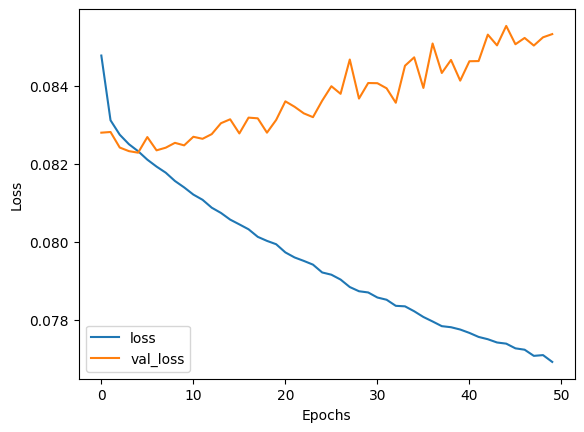

In [ ]:
train_loss = val['loss']
val_loss = val['val_loss']

# Courbes de perte d'entraînement et de perte de validation
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss: 0.0769 - accuracy: 0.8964 - val_loss: 0.0853 - val_accuracy: 0.8852


Les résultats affichent une perte d'entraînement (loss) de 0.0769 avec une précision (accuracy) de 0.8964, et une perte de validation (val_loss) de 0.0853 avec une précision de validation (val_accuracy) de 0.8852, indiquant une bonne performance mais avec un surajustement comme on peut le voir dans le graphe.

In [ ]:
model = Sequential()

## Le deuxieme modele avec le Le callback EarlyStopping

In [ ]:
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#La fonction de perte utilisée est la perte d'entropie croisée binaire
#(binary_crossentropy), adaptée aux tâches de classification binaire.
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
stop = EarlyStopping(
    monitor="val_loss",
    patience = 10,
    verbose = 1,
    mode = "min"
)

In [ ]:
model.fit(X_train_scaled,
          y_train,
          epochs = 300,
          validation_data = (X_test_scaled, y_test),
          callbacks = [stop])

Epoch 1/300
9901/9901 [==============================] - 28s 3ms/step - loss: 0.3588 - val_loss: 0.2640
Epoch 2/300
9901/9901 [==============================] - 41s 4ms/step - loss: 0.3290 - val_loss: 0.2615
Epoch 3/300
9901/9901 [==============================] - 24s 2ms/step - loss: 0.3253 - val_loss: 0.2604
Epoch 4/300
9901/9901 [==============================] - 27s 3ms/step - loss: 0.3243 - val_loss: 0.2608
Epoch 5/300
9901/9901 [==============================] - 24s 2ms/step - loss: 0.3223 - val_loss: 0.2597
Epoch 6/300
9901/9901 [==============================] - 25s 2ms/step - loss: 0.3212 - val_loss: 0.2596
Epoch 7/300
9901/9901 [==============================] - 25s 3ms/step - loss: 0.3204 - val_loss: 0.2592
Epoch 8/300
9901/9901 [==============================] - 25s 2ms/step - loss: 0.3209 - val_loss: 0.2597
Epoch 9/300
9901/9901 [==============================] - 22s 2ms/step - loss: 0.3198 - val_loss: 0.2598
Epoch 10/300
9901/9901 [==============================] - 24s 2m

Le callback EarlyStopping est utilisé pour arrêter l'entraînement prématurément si la perte de validation cesse de diminuer après un certain nombre d'époques (défini par le paramètre patience).

In [ ]:
val = pd.DataFrame(model.history.history)

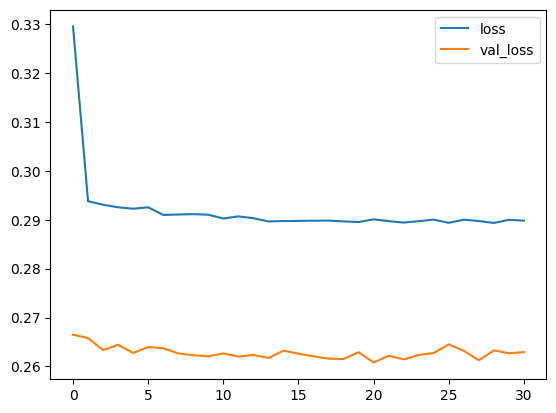

In [ ]:
val.plot();

In [ ]:
pred1 = 1 * (model.predict(X_test_scaled) > 0.7).reshape(len(y_test),)

2476/2476 [==============================] - 4s 2ms/step


In [ ]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65     15458
           1       0.90      0.95      0.92     63748

    accuracy                           0.88     79206
   macro avg       0.82      0.76      0.79     79206
weighted avg       0.87      0.88      0.87     79206



En conclusion, le modèle de deep learning semble avoir de bonnes performances dans la classification, avec une précision élevée et un bon équilibre entre précision et rappel pour les deux classes. Cependant, il est important de noter que le rappel pour la classe 0 est légèrement inférieur, ce qui signifie que le modèle pourrait manquer certains cas de défaut de remboursement.

##3e modele avec Keras Tuner

Dans le but de trouver une meilleure performance, on a essayé d'utiliser le modèle d'optimisation hyperparamétrique pour trouver automatiquement les meilleurs paramètres pour un réseau de neurones, ce qui  aurait permi de maximiser la précision de validation pour une tâche de classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Cette fonction définit l'architecture du réseau neuronal en fonction des hyperparamètres passés. Elle crée une architecture séquentielle avec des couches denses et des couches de dropout pour la régularisation

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=8, max_value=128, step=8),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_input', min_value=0.1, max_value=0.5, step=0.1)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=8, max_value=128, step=8),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='my_project')

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='my_project')

tuner.search(X_train, y_train,
             epochs=300,
             validation_data=(X_test, y_test),
             callbacks=[EarlyStopping(patience=10)])

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

best_model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)])

Trial 10 Complete [00h 09m 44s]
val_accuracy: 0.888253390789032

Best val_accuracy So Far: 0.8883922696113586
Total elapsed time: 01h 58m 14s
Epoch 1/300
9901/9901 [==============================] - 41s 4ms/step - loss: 0.2913 - accuracy: 0.8802 - val_loss: 0.2996 - val_accuracy: 0.8878
Epoch 2/300
9901/9901 [==============================] - 36s 4ms/step - loss: 0.2909 - accuracy: 0.8807 - val_loss: 0.3298 - val_accuracy: 0.8824
Epoch 3/300
9901/9901 [==============================] - 34s 3ms/step - loss: 0.2907 - accuracy: 0.8808 - val_loss: 0.3184 - val_accuracy: 0.8879
Epoch 4/300
9901/9901 [==============================] - 36s 4ms/step - loss: 0.2903 - accuracy: 0.8811 - val_loss: 0.2988 - val_accuracy: 0.8877
Epoch 5/300
9901/9901 [==============================] - 34s 3ms/step - loss: 0.2905 - accuracy: 0.8812 - val_loss: 0.3287 - val_accuracy: 0.8825
Epoch 6/300
9901/9901 [==============================] - 34s 3ms/step - loss: 0.2907 - accuracy: 0.8808 - val_loss: 0.3430 - val

loss: 0.2893 - accuracy: 0.8808 - val_loss: 0.3227 - val_accuracy: 0.8877


---



Une fois l'entraînement terminé, le meilleur modèle et les meilleurs hyperparamètres sont extraits à l'aide des méthodes get_best_models() et get_best_hyperparameters() du tuner.
Le meilleur modèle est alors entraîné sur l'ensemble de données d'entraînement complet avec les meilleurs hyperparamètres trouvés.